Link para o notebook que gerou este documento:

[https://github.com/dieguim-ifsp-posCD/D1MAT/blob/main/exercicios/20210427-D1MAT-lista01-resolucao.ipynb](https://github.com/dieguim-ifsp-posCD/D1MAT/blob/main/exercicios/20210427-D1MAT-lista01-resolucao.ipynb)

*\* Professora, me desculpe a verbosidade desta resolução, mas aproveitei para desenferrujar o $\LaTeX$ e o cálculo. Peço perdão se isso causou algum transtorno*

\clearpage

1. Um tanque com capacidade para 1.000 litros de água é drenado pela base em meia hora. Os valores na tabela mostram o volume $V$ de água remanescente no tanque (em litros) após $t$ minutos.

$\mathbf{t (min)}$|$5$|$10$|$15$|$20$|$25$|$30$
---|---|---|---|---|---|---
$\mathbf{V (L)}$|$694$|$444$|$250$|$111$|$28$|$0$


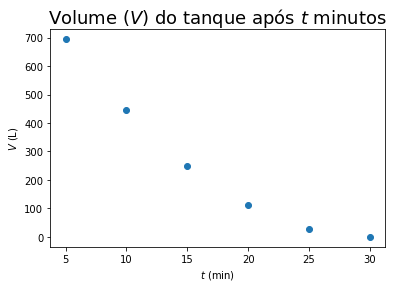

In [1]:
###HIDE-TO-CONVERT
## Plot dos pontos em um gráfico para referência
import matplotlib.pyplot as plt

tanque = [(5, 694), (10, 444), (15, 250), (20, 111), (25, 28), (30, 0)]

fig, ax = plt.subplots()
ax.set_title('Volume ($V$) do tanque após $t$ minutos', fontsize=18)
ax.set_ylabel('$V$ (L)')
ax.set_xlabel('$t$ (min)')

plt.scatter(*zip(*tanque))
plt.show()

a) Se $P$ é o ponto $(15, 250)$ sobre o gráfico de $V$, encontre as inclinações das retas secantes $PQ$, onde $Q$ é o ponto sobre o gráfico com $t = 5, 10, 20, 25$ e $30$.

**Solução**

Sejam os pontos $P = (t_p, V_p)$ e $Q = (t_q, V_q)$ no gráfico de Volume ($V$) x Tempo ($t$). A inclinação (coeficiente angular) da reta secante à curva em $P$ e $Q$ ($m_{pq}$) representa a **vazão média** de água do tanque no intervalo de tempo entre $t_p$ e $t_q$, e pode ser calculada pela fórmula:

\begin{equation}
m_{pq} = \frac{V_q - V_p}{t_q - t_p} (\mathrm{L/min})
\end{equation}

*i*. Para $Q = (5, 694)$

$$
m_{pq} = \frac{694 - 250}{5 - 15} = \mathbf{-44\mathrm{,}4}\: \mathrm{L/min}
$$

*ii*. Para $Q = (10, 444)$

$$
m_{pq} = \frac{444 - 250}{10 - 15} = \mathbf{-38\mathrm{,}8}\: \mathrm{L/min}
$$

*iii*. Para $Q = (20, 111)$

$$
m_{pq} = \frac{111 - 250}{20 - 15} = \mathbf{-27\mathrm{,}8}\: \mathrm{L/min}
$$

*iv*. Para $Q = (25, 28)$

$$
m_{pq} = \frac{28 - 250}{25 - 15} = \mathbf{-22\mathrm{,}2}\: \mathrm{L/min}
$$

*v*. Para $Q = (30, 0)$

$$
m_{pq} = \frac{0 - 250}{30 - 15} \approx \mathbf{-16\mathrm{,}7}\: \mathrm{L/min}
$$

In [2]:
###HIDE-TO-CONVERT
# Conferindo as contas: calculando o coeficiente angular para cada par de ponto P e Q
P = (15, 250)
print(f'P = {P}')

secantes = [(Q, (Q[1] - P[1])/(Q[0] - P[0])) for Q in tanque if Q != P]

for Q, m in secantes:
    print(f'Para Q = {Q}: m = {m}')

P = (15, 250)
Para Q = (5, 694): m = -44.4
Para Q = (10, 444): m = -38.8
Para Q = (20, 111): m = -27.8
Para Q = (25, 28): m = -22.2
Para Q = (30, 0): m = -16.666666666666668


----
\clearpage

b) Estime a inclinação da reta tangente em $P$ pela média das inclinações de duas retas secantes.

**Solução**

Podemos utilizar os pares de retas (*i*, *iv*) ou (*ii*, *iii*) do exercício anterior para calcular a média de inclinação, pois os pontos $Q$ pelos quais cada uma delas passa tem coordenadas em $t$ equidistantes de $P$.

Utilizando as retas *i* e *iv*:
$$
m_p = \frac{-44\mathrm{,}4 + (-22\mathrm{,}2)}{2} = -33\mathrm{,}3
$$

Utilizando as retas *ii* e *iii*:
$$
m_p = \frac{-38\mathrm{,}8 + (-27\mathrm{,}8)}{2} = -33\mathrm{,}3
$$

Portanto podemos estimar a inclinação da reta tangente em $P$, ou seja, a vazão instantânea de água do tanque em $t = 15$ como sendo de $\mathbf{-33\mathrm{,}3\: L/min}$

In [3]:
###HIDE-TO-CONVERT
# Conferindo as contas: calculando a média dos coeficientes angulares para as retas i e iv / ii e iii:
print(f'  Médias das retas i e iv: {(secantes[0][1] + secantes[3][1])/2}')
print(f'Médias das retas ii e iii: {(secantes[1][1] + secantes[2][1])/2}')

  Médias das retas i e iv: -33.3
Médias das retas ii e iii: -33.3


----
\clearpage

c) Use um gráfico da função para estimar a inclinação da tangente em $P$. (Essa inclinação representa a razão na qual a água flui do tanque após $15$ minutos.)

**Solução**

Vamos tentar deduzir o gráfico da função usando a biblioteca SciPy do Python

Função estimada: y = 1.11000 * x^2 -66.60429 * x +999.20000


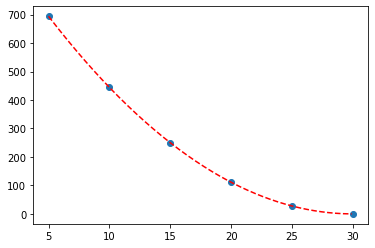

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Vamos usar uma função polinomial de grau 2 como objetivo
## y = ax² + bx + c
def objective(x, a, b, c):
    return a * x**2 + b * x + c

# Lista de tuplas que representam os pontos (t, V) do nosso tanque de água
tanque = [(5, 694), (10, 444), (15, 250), (20, 111), (25, 28), (30, 0)]

# Colocando os valores de cada eixo dos pontos nas variáveis 'x' e 'y'
x, y = list(zip(*tanque))

# Realizando o fit da curva com nossa função polinomial
popt, _ = curve_fit(objective, x, y)

# Colocando os coeficientes retornados pelo fit nas variáveis 'a', 'b' e 'c'
a, b, c = popt
print('Função estimada: y = %.5f * x^2 %+.5f * x %+.5f' % (a, b, c))

# Plotando os pontos do gráfico
plt.scatter(x, y)

## Plotando a nossa curva estimada
# Sequência dentro do intervalo em 'x', variando em 0,1
x_line = np.arange(min(x), max(x), 0.1)
# Valores de 'y' para cada ponto da sequência em 'x'
y_line = objective(x_line, a, b, c)
# Plotando uma linha para a função estimada
plt.plot(x_line, y_line, '--', color='red')
plt.show()

Pelo desenho do gráfico acima, nos parece que a função estimada é bastante razoável para descrever os pontos. Dessa forma, vamos então considerar a nossa função de vazão como sendo:

$$
V(t) = 1\mathrm{,}11t^2 - 66\mathrm{,}6t + 999\mathrm{,}2
$$

Agora, para estimar o valor da tangente em $P$, podemos fazer de duas formas:

***i*. Inclinação das retas secantes $PQ$ para pontos $Q$ muito próximos de $P$**

A partir de nossa função estimada, podemos calcular os valores de $V(t_p)$, $V(t_p+\delta)$ e $V(t_p-\delta)$ para valores muito pequenos de $\delta$ e, dessa forma, estimar numericamente o valor da inclinação da tangente no ponto $P$

In [5]:
tp = 15
delta = 1e-6

m1 = (objective(tp + delta, a, b, c) - objective(tp, a, b, c))/((tp + delta) - tp)
m2 = (objective(tp - delta, a, b, c) - objective(tp, a, b, c))/((tp - delta) - tp)

print(f'Inclinação para t + delta = {m1}')
print(f'Inclinação para t - delta = {m2}')

Inclinação para t + delta = -33.30428458175926
Inclinação para t - delta = -33.30428685549602


Portanto, utilizando este método numérico, o valor estimado para a vazão instantânea de água no momento $t = 15$ é de $\mathbf{-33\mathrm{,}3\: L/min}$

***ii*. Valor da derivada de $V(t)$ no ponto $t = 15$**

A partir da função $V(t)$, podemos calcular sua derivada (função de variação da vazão ao longo do tempo) e calcular seu valor para $t_p = 15$.

A derivada de $V(t)$, definida por $V'(t)$ é dada por:

$$
V'(t) = 2\mathrm{,}22t - 66\mathrm{,}6
$$

Para $t = t_p = 15$, temos:

$$
V'(t_p) = V'(15) = -33\mathrm{,}3
$$

Portanto, o valor estimado para a vazão instantânea de água no momento $t = 15$ é de $\mathbf{-33\mathrm{,}3\: L/min}$

----
\clearpage

2. Calcule os limites:

a) $\displaystyle\lim_{t\to-3}\frac{t^2-9}{2t^2+7t+3}$

**Solução**

O polinômio $t^2-9$ pode ser reescrito, da seguinte forma:
\begin{equation} \label{eq:1}
t^2 - 9 = (t + 3)(t - 3)
\end{equation}

Por sua vez, sendo $\left(-3; -\frac{1}{2}\right)$ as raízes do polinômio $2t^2 + 7t + 3$, podemos decompô-lo como:
\begin{equation} \label{eq:2}
2t^2 + 7t + 3 = 2(t+3)\left(t+\frac{1}{2}\right)
\end{equation}

Pelas equações (\ref{eq:1}) e (\ref{eq:2}) temos:
$$
\lim_{t\to-3}\frac{t^2-9}{2t^2+7t+3} = \lim_{t\to-3}\frac{(t + 3)(t - 3)}{2(t+3)\left(t+\frac{1}{2}\right)}
$$

Cancelando o termo $(t + 3)$ na divisão:
$$
\lim_{t\to-3}\frac{t^2-9}{2t^2+7t+3} = \lim_{t\to-3}\frac{t - 3}{2\left(t+\frac{1}{2}\right)} = \frac{-3 - 3}{2\left(-3 + \frac{1}{2}\right)} = \frac{-6}{-5} = \frac{6}{5}
$$

**Método 2 (L'Hôpital)**

A regra de L'Hôpital basicamente (ignorando muito da formalidade) enuncia que:

Se $\displaystyle\lim_{x\to c}\frac{f(x)}{g(x)} = \frac{0}{0}\; \mathrm{OU}\; \frac{\infty}{\infty}\; \mathrm{OU}\; \frac{-\infty}{-\infty}$

Então $\displaystyle\lim_{x\to c}\frac{f(x)}{g(x)} = \lim_{x\to c}\frac{f'(x)}{g'(x)}$

Como

$$
\lim_{t\to-3}\frac{t^2-9}{2t^2+7t+3} = \frac{(-3)^2-9}{2(-3)^2+7(-3)+3} = \frac{0}{0}
$$

Então podemos usar a regra de L'Hôpital para calcular o limite. Ou seja:

$$
\lim_{t\to-3}\frac{t^2-9}{2t^2+7t+3} = \lim_{t\to-3}\frac{2t}{4t+7} = \frac{2(-3)}{4(-3)+7} = \frac{-6}{-5} = \frac{6}{5}
$$

In [6]:
###HIDE-TO-CONVERT
# Conferindo a conta...
import sympy
  
t = sympy.symbols('t')
expr = (t**2 - 9)/(2*(t**2)+7*t+3)

sympy.limit(expr, t, -3)

6/5

----
\clearpage

b) $\displaystyle\lim_{x\to0}\frac{\sqrt{1+x}-\sqrt{1-x}}{x}$

**Solução**

Vamos multiplicar o numerador e o denominador da divisão por $\sqrt{1+x} + \sqrt{1-x}$:
\begin{align*}
\lim_{x\to0}\frac{\sqrt{1+x}-\sqrt{1-x}}{x} & = \lim_{x\to0}\frac{\sqrt{1+x}-\sqrt{1-x}}{x} \times \frac{\left(\sqrt{1+x} + \sqrt{1-x}\right)}{\left(\sqrt{1+x} + \sqrt{1-x}\right)} \\
 & = \lim_{x\to0}\frac{\left(\sqrt{1+x}\right)^2 - \left(\sqrt{1-x}\right)^2}{x \left(\sqrt{1+x} + \sqrt{1-x}\right)} \\
 & = \lim_{x\to0}\frac{1+x-(1-x)}{x \left(\sqrt{1+x} + \sqrt{1-x}\right)} \\
 & = \lim_{x\to0}\frac{2x}{x \left(\sqrt{1+x} + \sqrt{1-x}\right)}
\end{align*}

Cancelando $x$ na divisão:
$$
\lim_{x\to0}\frac{\sqrt{1+x}-\sqrt{1-x}}{x} = \lim_{x\to0}\frac{2}{\sqrt{1+x} + \sqrt{1-x}} = \frac{2}{\sqrt{1+0} + \sqrt{1+0}} = \frac{2}{2} = 1
$$


**Método 2 (L'Hôpital)**

Como
$$
\lim_{x\to0}\frac{\sqrt{1+x}-\sqrt{1-x}}{x} = \frac{\sqrt{1+0}-\sqrt{1-0}}{0} = \frac{0}{0}
$$

Então podemos usar L'Hôpital para calcular o limite.

Derivando o numerador $f(x) = \sqrt{1+x}-\sqrt{1-x}$ usando a *Regra da Cadeia* para cada termo da subtração temos que:
$$
\frac{d}{dx}\sqrt{1+x} = \frac{1}{2\sqrt{1+x}} \qquad \mathrm{e} \qquad \frac{d}{dx}\sqrt{1-x} = -\frac{1}{2\sqrt{1-x}}
$$

Portanto,
$$
\lim_{x\to0}\frac{\sqrt{1+x}-\sqrt{1-x}}{x} = \lim_{x\to0}\frac{\frac{1}{2\sqrt{1+x}} - \left(-\frac{1}{2\sqrt{1-x}}\right)}{1} = \frac{1}{2\sqrt{1+0}} + \frac{1}{2\sqrt{1-0}} = \frac{1}{2} + \frac{1}{2} = 1
$$


In [7]:
###HIDE-TO-CONVERT
# Conferindo a conta...
import sympy
  
x = sympy.symbols('x')
expr = (sympy.sqrt(1+x) - sympy.sqrt(1-x))/x

sympy.limit(expr, x, 0)

1

----
\clearpage

c) $\displaystyle\lim_{x\to-4}\frac{\frac{1}{4}+\frac{1}{x}}{4+x}$

**Solução**

Multiplicando a fração por $\frac{4x}{4x}$, temos:
\begin{align*}
\lim_{x\to-4}\frac{\frac{1}{4}+\frac{1}{x}}{4+x} & = \lim_{x\to-4}\frac{\frac{1}{4}+\frac{1}{x}}{4+x} \times \frac{4x}{4x} \\
 & = \lim_{x\to-4}\frac{4x\left(\frac{1}{4}+\frac{1}{x}\right)}{4x(4+x)} \\
 & = \lim_{x\to-4}\frac{x+4}{4x(x+4)} \\
\end{align*}

Cancelando o termo $(x+4)$ na divisão:
$$
\lim_{x\to-4}\frac{\frac{1}{4}+\frac{1}{x}}{4+x} = \lim_{x\to-4}\frac{1}{4x} = \frac{1}{4(-4)} = -\frac{1}{16}
$$

**Método 2 (L'Hôpital)**

Como
$$
\lim_{x\to-4}\frac{\frac{1}{4}+\frac{1}{x}}{4+x} = \frac{\frac{1}{4}+\frac{1}{-4}}{4+(-4)} = \frac{0}{0}
$$

Então podemos usar L'Hôpital:
$$
\lim_{x\to-4}\frac{\frac{1}{4}+\frac{1}{x}}{4+x} = \lim_{x\to-4}\frac{-\frac{1}{x^2}}{1} = -\frac{1}{(-4)^2} = -\frac{1}{16}
$$

In [8]:
###HIDE-TO-CONVERT
# Conferindo a conta...
import sympy
  
x = sympy.symbols('x')
expr = (1/4 + 1/x)/(4+x)

sympy.limit(expr, x, -4)

-1/16

In [9]:
###HIDE-TO-CONVERT
!jupyter nbconvert --to pdf --RegexRemovePreprocessor.patterns "^###HIDE-TO-CONVERT" 20210427-D1MAT-lista01-resolucao.ipynb

[NbConvertApp] Converting notebook 20210427-D1MAT-lista01-resolucao.ipynb to pdf
[NbConvertApp] Support files will be in 20210427-D1MAT-lista01-resolucao_files/
[NbConvertApp] Making directory ./20210427-D1MAT-lista01-resolucao_files
[NbConvertApp] Writing 34208 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 85523 bytes to 20210427-D1MAT-lista01-resolucao.pdf
